# Geometric factor calculations using Monte Carlo simulation data 
By Andrei R. Hanu - <andrei.hanu@nasa.gov>

## Introduction

The geometric factor ($\bf{G}$, units of cm$^2$ sr) of a particle detector is analogous to the "collecting power" of an optical telescope and is a function of the surface area of the instrument and detection efficiency, which itself is a function of the charge, mass, and energy of the incident particles. If the detector's geometry factor is known, the spatial differential flux ($\bf{\Phi}$, units of particles cm$^{-2}$ sr$^{-1}$ sec$^{-1}$) incident on the detector can be calculated from the counting rate ($\bf{N_D}$, units of particles $sec^{-1}$). So very simply, the geometric factor is defined as the counts received by a detector per unit time divided by the spatial differential flux around the instrument.

$$ G = \frac{N_D}{J} $$

** Note: For radiation risk assesment calculations, the flux is typically measured in energy bins with units of particles cm$^{-2}$ sr$^{-1}$ sec$^{-1}$ MeV$^{-1}$ **

Tradiationally, a detector's geometric factor has usually been estimated by approximation, however, only a few analytical solutions exist for simple source and detector geometries - see Sullivan (1971). For more complicated detector geometries, including electronic coincidence/anti-coincidence logic, an analytical solution might be difficult, or even impossible, to derive in the closed form. In such cases, the Monte Carlo technique is employed to compute the geometrical factor, see Crannell et al. (1971), by surrounded the detector geometry with a spherical source and assuming an isotropic radiation environment. Although, you can also apply this technique to anisotropic radiation environments. 

## Isotropic Radiation



## Source Normalization

For isotropic radiation environments, the number of particles $\bf{N_R}$ traversing a sphere is determined by the integrating the spatial differential flux over the surface area of the sphere and solid angle.

$$ N_R = \int_{\Omega}\int_{S} JdSd\Omega $$

Where the differential surface area ($\bf{dS}$) and differential solid angle ($\bf{d\Omega}$) in spherical coordinates is:

$$ dS = R^2 sin \theta d\theta d\phi $$

$$ d\Omega = sin \theta d\theta d\phi $$

Working through the integral, we see that the number of particles $\bf{N_R}$ traversing a sphere is:

$$ N_R = 4 \pi^2 R^2 J $$

And it depends on:

- The radius (ie. bigger sphere == more particles crossing the sphere)
- The spatial differential flux (ie. more flux == more particles crossing the sphere)

Finally, by using Eq.1 and Eq. 5 the geometric factor for an isotropic radiation environments can be written as follows:

$$ G = \frac{N_D}{N_R}4 \pi^2 R^2 $$

Where:

- $N_D$ is the number of particles interacting with the detector model
- $N_R$ is the total number of simulated particles
- $R$ is the radius of the spherical source encircling the detector model

The associated standard deviation ($\bf{\sigma_G}$) is obtained from the binomial distribution and follows:

$$ \sigma_G = 4\pi^2R^2 \sqrt{\left(1-\frac{N_D}{N_R}\right)\frac{N_D}{N_R^2}} $$

## Monte Carlo method

To calculate the geometric factor of a detector using the Monte Carlo method, the following steps need to be taken:

- The detector geometry, or a simplified model, should be implemented in your favourite Monte Carlo particle transport  code (Geant4, MCNP, FLUKA, EGS, etc)

If an isotropic flux, typical of space-borne instruments, is assumed:

- The detector geometry is enveloped by a spherical source such that the spectral, spatial, and angular distribution of primary particles can be specified

- The primary particles must be uniformly distributed over the entire surface of spherical source
- The angular distribution for the emission of primary particles must follow a cosine-law distribution

## References

+ Sullivan, J. D. "Geometric factor and directional response of single and multi-element particle telescopes." Nuclear Instruments and methods 95.1 (1971): 5-11.

+ Crannell, C. J., and J. F. Ormes. "Geometrical-factor determination using a monte carlo approach." Nuclear Instruments and Methods 94.1 (1971): 179-183.

+ Sanderson, T. R., and D. E. Page. "Geometrical aspects of the performance of cosmic ray detector telescopes in non-isotropic particle distributions." Nuclear Instruments and Methods 104.3 (1972): 493-504.


In [1]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Divide integers
from __future__ import division

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.25,4.2*1.25]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [2]:
##########################################################################################
# Energy of incident particles (Protons)
# InputEnergies = np.array([np.linspace(10000,90000, num=9, endpoint=True, dtype = int),
#                 np.linspace(15000,95000, num=9, endpoint=True, dtype = int),
#                 np.linspace(100000,900000, num=9, endpoint=True, dtype = int),
#                 np.linspace(1000000,9000000, num=9, endpoint=True, dtype = int)
#                 ]).flatten()

# InputEnergies = (np.around(np.logspace(1.0, 3.0, num=50),3)*1000).astype(int)
InputEnergies = (np.around(np.logspace(1.0, 5.0, num=60),5)).astype(int)

# Folder containing simulation data
DataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/Protons/'

##########################################################################################
# Energy thresholds (in eV) for events that will be included in the analysis
Thr_TEPC = 100.
Thr_ACD = 100.

# Print a list of input proton energies
print "Input Proton Energies: ", InputEnergies
# for InputEnergy in InputEnergies[InputEnergies.argsort()]:
#     print InputEnergy/1E3, "\t"

Input Proton Energies:  [    10     11     13     15     18     21     25     29     34     40
     47     55     65     76     88    103    121    142    166    194
    226    265    310    362    423    495    579    676    791    924
   1081   1263   1477   1726   2018   2359   2758   3224   3769   4406
   5150   6020   7038   8227   9617  11242  13141  15361  17957  20991
  24537  28683  33529  39194  45815  53556  62605  73182  85546 100000]


In [3]:
##########################################################################################
# Load the simulation data for each input energy and calculate the geometric factor
# If the data file has energy in form 1e+06, you can use the following shell script to
# change the name:
# for f in *; do mv "$f" "`echo $f | sed -e "s/e+06/000000/g"`"; done

# Pandas dataframe to hold the raw number of events from each simulation
Data = pandas.DataFrame(index = InputEnergies,
                        columns = ('Source Particles', 
                                   'Total',
                                   'Subthreshold',
                                   'Coinc', 
                                   'Anti-Coinc'))

# Geant4 Source Information
R = 7.75    # Source Radius

# Pandas dataframe of the calculate geometric factors
DataGF = pandas.DataFrame(index = InputEnergies,
                          columns = ('GF Total [cm^2 sr]', 
                                     'GF Total [cm^2 sr] Error',
                                     'GF Coinc [cm^2 sr]',
                                     'GF Coinc [cm^2 sr] Error',
                                     'GF Anti-Coinc [cm^2 sr]',
                                     'GF Anti-Coinc [cm^2 sr] Error'))

# Loop through the input energies to process the data
for InputEnergy in InputEnergies[InputEnergies.argsort()]:
    # Create data file template from current energy 
    DataFilename = 'proton_' + str(InputEnergy) + 'MeV_Nr_*_ISO_nt_G4CNPTEPC_t*.csv*'
    
    # Statistics variables for each input energy data
    nR = 0
    nTotal = 0
    nCoinc = 0
    nAntiCoinc = 0
    nSubThr = 0
    
    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Energy deposited in the TEPC sensitive volume [eV]
    # Column 1 - Track length of particles that entirely traverse the TEPC [mm]
    # Column 2 - Energy deposited in the plastic scintillator [eV]
    for dataFile in glob.glob(DataFolder + DataFilename):  
        # Readout CSV files
        try:
#             dataFrame = pandas.read_csv(dataFile, header=-1, skiprows=6, usecols=[0,1,2]).values
            dataFrame = pandas.read_csv(dataFile, compression='gzip', header=-1, skiprows=6, usecols=[0,1,2]).values

            # Extract the number of source particles from the data filename
            nR = int(dataFile.split('_')[-5])

            # Increment statistics
            nTotal += dataFrame[(dataFrame[:,0] > Thr_TEPC),0].size
            nCoinc += dataFrame[np.logical_and((dataFrame[:,2] > Thr_ACD),(dataFrame[:,0] > Thr_TEPC)),0].size
            nAntiCoinc += dataFrame[np.logical_and((dataFrame[:,2] <= Thr_ACD),(dataFrame[:,0] > Thr_TEPC)),0].size
            nSubThr += dataFrame[(dataFrame[:,0] <= Thr_TEPC),0].size
        except:
            # Extract the number of source particles from the data filename
            nR = int(dataFile.split('_')[-5])
            pass
    
    print 'Finished processing data files for', InputEnergy, 'MeV'
    
    # Append the statistics to the Data list
    Data.loc[InputEnergy] = [nR,nTotal,nSubThr,nCoinc,nAntiCoinc]
#     print Data.loc[InputEnergy]
    
    # Calculate the geometric factors and append to the DataGF list
    try:
        DataGF.loc[InputEnergy] = [nTotal/nR*4*(np.pi**2)*(R**2),
                                   4*(np.pi**2)*(R**2)*np.sqrt((1-nTotal/nR)*nTotal/nR**2),
                                   nCoinc/nR*4*(np.pi**2)*(R**2),
                                   4*(np.pi**2)*(R**2)*np.sqrt((1-nCoinc/nR)*nCoinc/nR**2),
                                   nAntiCoinc/nR*4*(np.pi**2)*(R**2),
                                   4*(np.pi**2)*(R**2)*np.sqrt((1-nAntiCoinc/nR)*nAntiCoinc/nR**2)]
#         print nTotal/nR*4*(np.pi**2)*(R**2)
    except:
        pass

# Fill all the NaN to zeros
# Data.fillna(0)
# DataGF.fillna(0)

Finished processing data files for 10 MeV
Finished processing data files for 11 MeV
Finished processing data files for 13 MeV
Finished processing data files for 15 MeV
Finished processing data files for 18 MeV
Finished processing data files for 21 MeV
Finished processing data files for 25 MeV
Finished processing data files for 29 MeV
Finished processing data files for 34 MeV
Finished processing data files for 40 MeV
Finished processing data files for 47 MeV
Finished processing data files for 55 MeV
Finished processing data files for 65 MeV
Finished processing data files for 76 MeV
Finished processing data files for 88 MeV
Finished processing data files for 103 MeV
Finished processing data files for 121 MeV
Finished processing data files for 142 MeV
Finished processing data files for 166 MeV
Finished processing data files for 194 MeV
Finished processing data files for 226 MeV
Finished processing data files for 265 MeV
Finished processing data files for 310 MeV
Finished processing data f

In [4]:
# Print the data file statistics
print '\n', Data


        Source Particles     Total  Subthreshold     Coinc  Anti-Coinc
10            1000000000       884           409       369         515
11            1000000000      1172           550       514         658
13            1000000000      1776           907       828         948
15            1000000000      2904          1338      1420        1484
18            1000000000      4587          2306      2274        2313
21            1000000000      6194          3021      3232        2962
25            1000000000      7018          3267      3555        3463
29            1000000000      7823          3455      3784        4039
34            1000000000   3322379          4489      4737     3317642
40              79990000    711537           433     10898      700639
47               1680000     79681            14     69746        9935
55               3860000    230644           139    221116        9528
65              16150000   1012065          3672   1002389        9676
76   

In [5]:
# Print the geometric factors
print '\n', DataGF

# Save the geometry factors to a *.csv file
DataGF.to_csv(DataFolder + 'Geometric_Factor_Protons.csv', index=True)


       GF Total [cm^2 sr] GF Total [cm^2 sr] Error GF Coinc [cm^2 sr]  \
10             0.00209612                 7.05e-05        0.000874963   
11             0.00277901              8.11758e-05         0.00121878   
13              0.0042112              9.99273e-05         0.00196333   
15             0.00688588              0.000127779         0.00336706   
18              0.0108766              0.000160593         0.00539205   
21               0.014687              0.000186615         0.00766363   
25              0.0166409              0.000198641         0.00842952   
29              0.0185497              0.000209724         0.00897252   
34                7.87793               0.00431484          0.0112322   
40                21.0923                0.0248935           0.323053   
47                112.463                 0.388848            98.4404   
55                141.683                 0.286067             135.83   
65                148.593                 0.143002

In [6]:
print 'Energy [MeV]','Total Error [%]','Coinc Error [%]','Anti-Coinc Error [%]'
for E, err_GF_Total, err_GF_Coinc, err_GF_AntiCoinc in zip(InputEnergies, 
                                       DataGF['GF Total [cm^2 sr] Error']/DataGF['GF Total [cm^2 sr]']*100,
                                       DataGF['GF Coinc [cm^2 sr] Error']/DataGF['GF Coinc [cm^2 sr]']*100,
                                       DataGF['GF Anti-Coinc [cm^2 sr] Error']/DataGF['GF Anti-Coinc [cm^2 sr]']*100):
    print E,'\t\t', np.around(err_GF_Total,3), '\t\t', np.around(err_GF_Coinc,3), '\t\t', np.around(err_GF_AntiCoinc,3)

Energy [MeV] Total Error [%] Coinc Error [%] Anti-Coinc Error [%]
10 		3.363 		5.206 		4.407
11 		2.921 		4.411 		3.898
13 		2.373 		3.475 		3.248
15 		1.856 		2.654 		2.596
18 		1.477 		2.097 		2.079
21 		1.271 		1.759 		1.837
25 		1.194 		1.677 		1.699
29 		1.131 		1.626 		1.573
34 		0.055 		1.453 		0.055
40 		0.118 		0.958 		0.119
47 		0.346 		0.371 		1.0
55 		0.202 		0.206 		1.023
65 		0.096 		0.097 		1.016
76 		0.061 		0.061 		1.017
88 		0.038 		0.038 		0.921
103 		0.035 		0.035 		0.997
121 		0.028 		0.028 		0.878
142 		0.028 		0.028 		0.974
166 		0.025 		0.025 		0.943
194 		0.022 		0.022 		0.877
226 		0.024 		0.024 		1.044
265 		0.02 		0.02 		0.926
310 		0.019 		0.019 		0.905
362 		0.019 		0.019 		0.958
423 		0.015 		0.015 		0.791
495 		0.017 		0.017 		0.949
579 		0.014 		0.014 		0.82
676 		0.015 		0.015 		0.912
791 		0.02 		0.02 		1.271
924 		0.015 		0.015 		0.924
1081 		0.021 		0.021 		1.293
1263 		0.017 		0.017 		1.034
1477 		0.016 		0.016 		0.958
1726 		0.019 		0.019 		1.093


Plot saved to: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Protons/Geometric_Factor_Protons.pdf


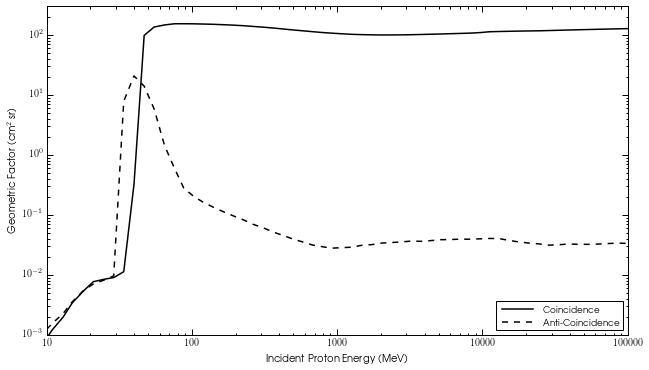

In [7]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)

# plt.loglog(DataGF.index, DataGF['GF Total [cm^2 sr]'], 'k-', marker='.', linewidth=1., label="Total")
try:
    plt.loglog(DataGF.index, DataGF['GF Coinc [cm^2 sr]'], 'k-', linewidth=1.5, label="Coincidence")
    plt.loglog(DataGF.index, DataGF['GF Anti-Coinc [cm^2 sr]'], 'k--', linewidth=1.5, label="Anti-Coincidence")
except:
    pass

# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Proton Energy (MeV)') 
axG.set_ylim(0.001, 300.)
axG.set_xlim(10., 100000.)

from matplotlib.ticker import ScalarFormatter
axG.xaxis.set_major_formatter(ScalarFormatter())

axG.legend(loc='lower right',handlelength=4)

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figG = 'Geometric_Factor_Protons.pdf'
plt.savefig(DataFolder + file_figG, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figG)

# Show the figure
plt.show(figG)

In [8]:
# Print a LaTeX table using the Pandas DataFrame
print DataGF.to_latex(index=True, columns = ('GF Coinc [cm^2 sr]',
                                             'GF Coinc [cm^2 sr] Error',
                                             'GF Anti-Coinc [cm^2 sr]',
                                             'GF Anti-Coinc [cm^2 sr] Error'),
                                  formatters={'GF Anti-Coinc [cm^2 sr]': lambda x: '{:0.1f}'.format(x),
                                              'GF Anti-Coinc [cm^2 sr] Error': lambda x: '{:0.1f}'.format(x),
                                              'GF Coinc [cm^2 sr]': lambda x: '{:0.1f}'.format(x),
                                              'GF Coinc [cm^2 sr] Error': lambda x: '{:0.1g}'.format(x)})

\begin{tabular}{lllll}
\toprule
{} & GF Coinc [cm\textasciicircum2 sr] & GF Coinc [cm\textasciicircum2 sr] Error & GF Anti-Coinc [cm\textasciicircum2 sr] & GF Anti-Coinc [cm\textasciicircum2 sr] Error \\
\midrule
10     &        0.000874963 &              4.55487e-05 &              0.00122115 &                   5.38105e-05 \\
11     &         0.00121878 &              5.37582e-05 &              0.00156023 &                   6.08241e-05 \\
13     &         0.00196333 &              6.82304e-05 &              0.00224787 &                   7.30074e-05 \\
15     &         0.00336706 &              8.93526e-05 &              0.00351882 &                   9.13439e-05 \\
18     &         0.00539205 &              0.000113073 &              0.00548452 &                   0.000114038 \\
21     &         0.00766363 &              0.000134803 &              0.00702341 &                   0.000129049 \\
25     &         0.00842952 &              0.000141378 &              0.00821137 &         

In [9]:
for E in InputEnergies:
    # Find the largest error between the total, coincidence, and anti-coincidence geometric factors
    errMax = max(DataGF['GF Total [cm^2 sr] Error'].loc[E]/DataGF['GF Total [cm^2 sr]'].loc[E]*100,
                 DataGF['GF Coinc [cm^2 sr] Error'].loc[E]/DataGF['GF Coinc [cm^2 sr]'].loc[E]*100,
                 DataGF['GF Anti-Coinc [cm^2 sr] Error'].loc[E]/DataGF['GF Anti-Coinc [cm^2 sr]'].loc[E]*100)
    
    # If the maximum error is below 1%, scale down the number of source particles (Nr) to save computation time
    # Otherwise scale it up so that we achieve 1% uncertainty
    N_R = np.array(1E6)
    if errMax > 1:
        N_R = np.around(Data['Source Particles'].loc[E]*errMax**2, decimals=-4)
        if N_R > 1E9:
            N_R = np.array(1E9)
        print '/control/alias N_R', N_R.astype(int)
    elif pandas.isnull(errMax):
        print '/control/alias N_R', N_R.astype(int)
    else:
        N_R = np.around(Data['Source Particles'].loc[E]*errMax**2, decimals=-4)
        print '/control/alias N_R', N_R.astype(int)
    
    # Print the energy line
    print "/control/loop runProton_ISO.mac Ekin", E, E

/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 10 10
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 11 11
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 13 13
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 15 15
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 18 18
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 21 21
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 25 25
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 29 29
/control/alias N_R 1000000000
/control/loop runProton_ISO.mac Ekin 34 34
/control/alias N_R 73390000
/control/loop runProton_ISO.mac Ekin 40 40
/control/alias N_R 1680000
/control/loop runProton_ISO.mac Ekin 47 47
/control/alias N_R 4040000
/control/loop runProton_ISO.mac Ekin 55 55
/control/alias N_R 16680000
/control/loop runProton_ISO.mac Ekin 65 65
/control/alias N_R 39780000
/control/loop runProton_ISO.mac E